# Clustering Jerárquico

## Carga de paquetes

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import matplotlib as mpl
import urllib.request
import seaborn as sns
import tqdm
import scipy
import joblib
from pathlib import Path
from IPython.display import Audio, Markdown, Image
from spotipy.oauth2 import SpotifyClientCredentials 

import pylab


import scipy.cluster.hierarchy

# Números y Datos
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.interpolate import interp1d

# Análisis de sonido


from scipy.signal import savgol_filter

# Machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import euclidean_distances
#sns.set_context('poster')
sns.set_style('darkgrid')

plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
#import funciones as fn

from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster

from sklearn.metrics import adjusted_rand_score, silhouette_score, silhouette_samples #Librería Silhouette

from sklearn.cluster import AgglomerativeClustering #Librería para etiquetar por clustering aglomerativo

## Carga de dataset

In [2]:
df_base = pd.read_pickle('C:/Users/nicol/tp_1/sources/df_todo_0_sin_escalar.pickle')
df_2 = df_base
columnas = df_2.columns

## Selecciono features a utilizar

In [3]:
features_af = ['danceability','energy','loudness','speechiness','acousticness','acousticness','valence']
features_af_otras= ['duration_ms','tempo','time_signature']
features_aa = ['p00_C_50','p01_C#_50','p02_D_50','p03_D#_50','p04_E_50','p05_F_50']

In [4]:
genre_real = df_2['genre']

In [5]:
df_2.head()

af_duration_ms  af_popularity  af_danceability  \
id                                                                       
4d3XHYFFuYYzxWr2cJ6yQl          349600             49            0.487   
3X3p3u03P8eFL8WTH0oaaU          344066             47            0.615   
4KlXeaheot0OI9PoOWspvZ          348746             13            0.792   
3j76McoUI18gDoqxYE14Bu          275935             25            0.670   
4zxd4tiXPlWMqoJltbVTbE          284560             56            0.485   

                        af_energy  af_key  af_loudness  af_mode  \
id                                                                
4d3XHYFFuYYzxWr2cJ6yQl      0.145       5      -18.670        1   
3X3p3u03P8eFL8WTH0oaaU      0.204       7      -16.075        1   
4KlXeaheot0OI9PoOWspvZ      0.301       9       -9.925        0   
3j76McoUI18gDoqxYE14Bu      0.532       2      -16.138        1   
4zxd4tiXPlWMqoJltbVTbE      0.144      10      -12.824        1   

                        af_speechiness  af_acousticness  af_instrumentalness  \
id                                                                             
4d3XHYFFuYYzxWr2cJ6yQl          0.0522            0.876             0.822000   
3X3p3u03P8eFL8WTH0oaaU          0.0439            0.872             0.382000   
4KlXeaheot0OI9PoOWspvZ          0.0409            0.546             0.821000   
3j76McoUI18gDoqxYE14Bu          0.0313            0.708             0.657000   
4zxd4tiXPlWMqoJltbVTbE          0.0362            0.912             0.000114   

                        ...  aa_t11_dif_iqr  genre  aa_pitch_dif_mediana  \
id                      ...                                                
4d3XHYFFuYYzxWr2cJ6yQl  ...       43.405653   jazz             -0.001840   
3X3p3u03P8eFL8WTH0oaaU  ...       45.034865   jazz             -0.004555   
4KlXeaheot0OI9PoOWspvZ  ...       26.072556   jazz             -0.002628   
3j76McoUI18gDoqxYE14Bu  ...       60.408848   jazz             -0.000255   
4zxd4tiXPlWMqoJltbVTbE  ...       43.757320   jazz             -0.006836   

                        aa_pitch_dif_iqr  aa_pitch_mediana  aa_pitch_iqr  \
id                                                                         
4d3XHYFFuYYzxWr2cJ6yQl          0.216329          0.101333      0.262750   
3X3p3u03P8eFL8WTH0oaaU          0.548000          0.130458      0.286479   
4KlXeaheot0OI9PoOWspvZ          0.430079          0.142083      0.370917   
3j76McoUI18gDoqxYE14Bu          0.533899          0.326875      0.423354   
4zxd4tiXPlWMqoJltbVTbE          0.249678          0.133000      0.293167   

                        aa_timbre_dif_mediana  aa_timbre_dif_iqr  \
id                                                                 
4d3XHYFFuYYzxWr2cJ6yQl               1.216581          80.591493   
3X3p3u03P8eFL8WTH0oaaU               0.002209          85.495698   
4KlXeaheot0OI9PoOWspvZ               0.118969          98.532840   
3j76McoUI18gDoqxYE14Bu               0.019877         117.569667   
4zxd4tiXPlWMqoJltbVTbE              -0.484088          77.149394   

                        aa_timbre_mediana  aa_timbre_iqr  
id                                                        
4d3XHYFFuYYzxWr2cJ6yQl           0.948167      39.966250  
3X3p3u03P8eFL8WTH0oaaU           2.538250      33.967750  
4KlXeaheot0OI9PoOWspvZ          -3.171833      45.036458  
3j76McoUI18gDoqxYE14Bu         -10.301625      35.201458  
4zxd4tiXPlWMqoJltbVTbE           3.227750      44.342958  

[5 rows x 139 columns]

In [6]:
df_2 = df_2.drop(['genre'], axis=1)
features_af = df_2.columns

##  Escalado rango 0-1

In [7]:
# Clustering (sklearn)
from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0,1))
#df_2=scaler.fit_transform(df_2)
#df_2 = pd.DataFrame(df_2)
#df_2.columns = features_af
#df_2

## Filtro filas para acelerar procesamiento

In [8]:
#Trabajo con primeras 200 filas
#df_2 = df_2.iloc[:100,:]
df_2

af_duration_ms  af_popularity  af_danceability  \
id                                                                       
4d3XHYFFuYYzxWr2cJ6yQl          349600             49            0.487   
3X3p3u03P8eFL8WTH0oaaU          344066             47            0.615   
4KlXeaheot0OI9PoOWspvZ          348746             13            0.792   
3j76McoUI18gDoqxYE14Bu          275935             25            0.670   
4zxd4tiXPlWMqoJltbVTbE          284560             56            0.485   
...                                ...            ...              ...   
5vSsQH8wH68PDKJbNfxzpc          479817             17            0.454   
7xYKAlU77jAAnAixQ5IgSn          569133              0            0.572   
4hXEgyy5nNgdiBvJcJ9o8u          200563              0            0.673   
4HpSbJgNpoOphIeCK3z9sk          187240              0            0.569   
30KzbX1viF0aTL1NS5coDY          309346              0            0.616   

                        af_energy  af_key  af_loudness  af_mode  \
id                                                                
4d3XHYFFuYYzxWr2cJ6yQl      0.145       5      -18.670        1   
3X3p3u03P8eFL8WTH0oaaU      0.204       7      -16.075        1   
4KlXeaheot0OI9PoOWspvZ      0.301       9       -9.925        0   
3j76McoUI18gDoqxYE14Bu      0.532       2      -16.138        1   
4zxd4tiXPlWMqoJltbVTbE      0.144      10      -12.824        1   
...                           ...     ...          ...      ...   
5vSsQH8wH68PDKJbNfxzpc      0.991       2       -6.228        0   
7xYKAlU77jAAnAixQ5IgSn      0.802       5      -12.491        0   
4hXEgyy5nNgdiBvJcJ9o8u      0.795       9       -8.033        1   
4HpSbJgNpoOphIeCK3z9sk      0.728       1       -6.648        1   
30KzbX1viF0aTL1NS5coDY      0.894       5       -7.845        0   

                        af_speechiness  af_acousticness  af_instrumentalness  \
id                                                                             
4d3XHYFFuYYzxWr2cJ6yQl          0.0522         0.876000             0.822000   
3X3p3u03P8eFL8WTH0oaaU          0.0439         0.872000             0.382000   
4KlXeaheot0OI9PoOWspvZ          0.0409         0.546000             0.821000   
3j76McoUI18gDoqxYE14Bu          0.0313         0.708000             0.657000   
4zxd4tiXPlWMqoJltbVTbE          0.0362         0.912000             0.000114   
...                                ...              ...                  ...   
5vSsQH8wH68PDKJbNfxzpc          0.0454         0.000017             0.915000   
7xYKAlU77jAAnAixQ5IgSn          0.0310         0.000499             0.831000   
4hXEgyy5nNgdiBvJcJ9o8u          0.0433         0.008060             0.848000   
4HpSbJgNpoOphIeCK3z9sk          0.0353         0.083600             0.003180   
30KzbX1viF0aTL1NS5coDY          0.0285         0.014600             0.130000   

                        ...  aa_t10_dif_iqr  aa_t11_dif_iqr  \
id                      ...                                   
4d3XHYFFuYYzxWr2cJ6yQl  ...       68.940911       43.405653   
3X3p3u03P8eFL8WTH0oaaU  ...       92.772529       45.034865   
4KlXeaheot0OI9PoOWspvZ  ...       81.445786       26.072556   
3j76McoUI18gDoqxYE14Bu  ...       84.224212       60.408848   
4zxd4tiXPlWMqoJltbVTbE  ...       64.901842       43.757320   
...                     ...             ...             ...   
5vSsQH8wH68PDKJbNfxzpc  ...       60.286450       73.488603   
7xYKAlU77jAAnAixQ5IgSn  ...       63.578226       55.442999   
4hXEgyy5nNgdiBvJcJ9o8u  ...      113.178135       51.838925   
4HpSbJgNpoOphIeCK3z9sk  ...       73.441439       51.655107   
30KzbX1viF0aTL1NS5coDY  ...       64.836879       38.383705   

                        aa_pitch_dif_mediana  aa_pitch_dif_iqr  \
id                                                               
4d3XHYFFuYYzxWr2cJ6yQl             -0.001840          0.216329   
3X3p3u03P8eFL8WTH0oaaU             -0.004555          0.548000   
4KlXeaheot0OI9PoOWspvZ             -0.002628          0.430079  

## Cluestering Jerárquico

### Método average

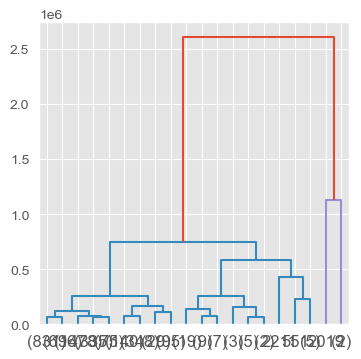

In [9]:
# Clustering (scipy)
z = linkage(df_2, method='average', metric='euclidean')
plt.figure()
dn = dendrogram(z, p=20 ,truncate_mode = 'lastp')

### Estiramiento de la imagen

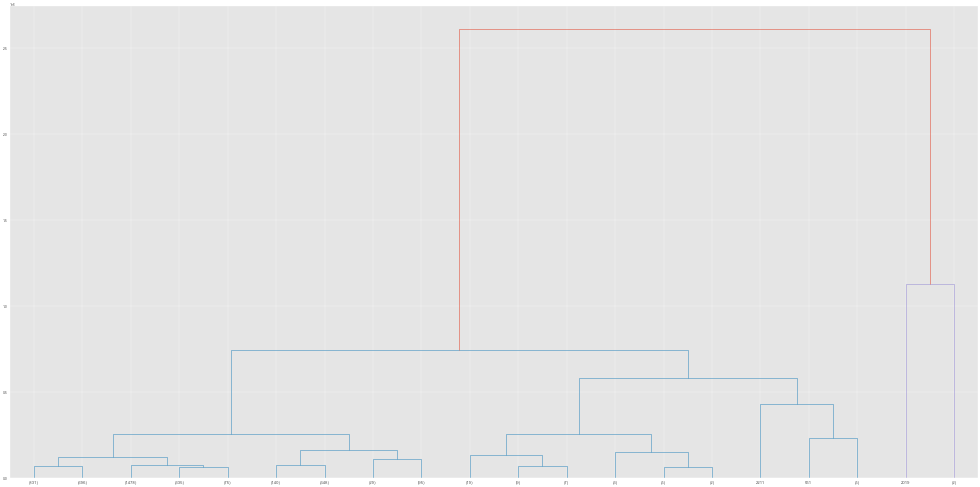

In [10]:
plt.rcParams['figure.figsize'] = [50, 25]
plt.rcParams['figure.dpi'] = 25 # 200 e.g. is really fine, but slower
plt.figure()
dn = dendrogram(z, p=20 ,truncate_mode = 'lastp')

## Matriz de distancia entre las observaciones

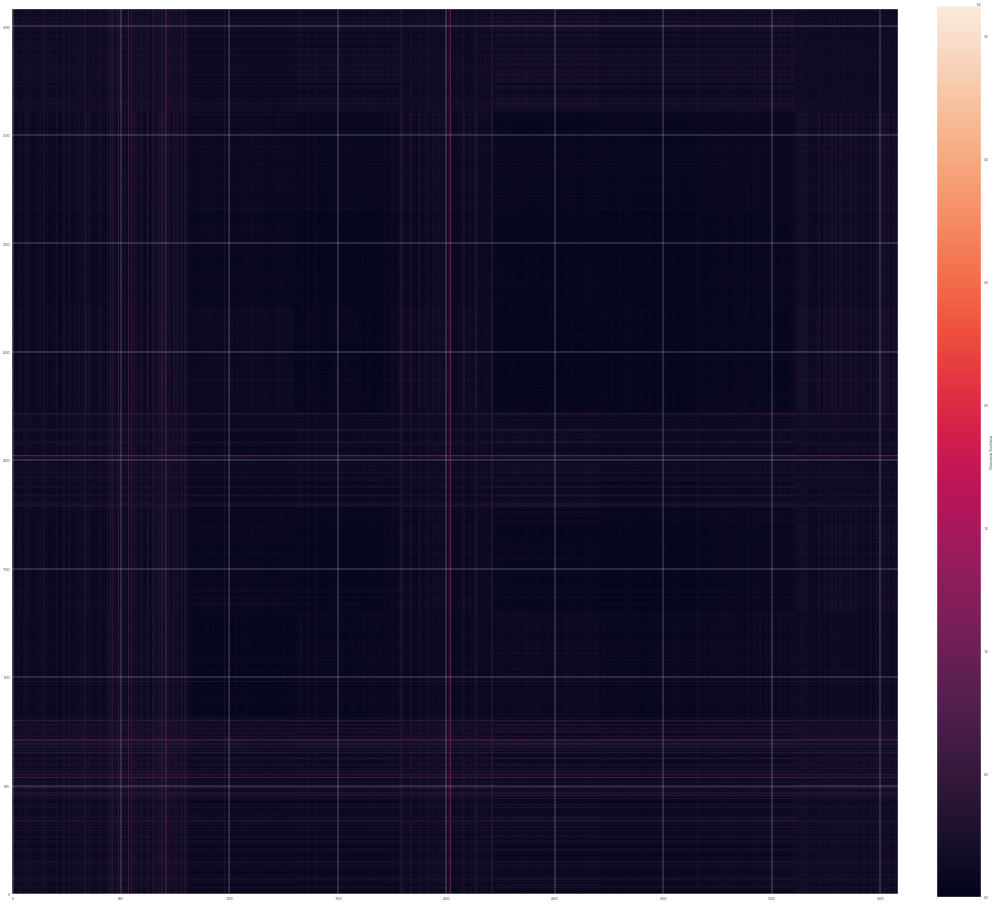

In [11]:
d  = euclidean_distances(df_2, df_2)

plt.figure(figsize=(50,50))
plt.imshow(d,aspect='auto',origin='bottom');
plt.colorbar(label='Distancia Euclidea',fraction=0.046, pad=0.04)
plt.gca().set_aspect('equal')
#plt.xlabel('Tiempo (segundos)');

## Gráfico dendrograma y Matriz de correlación

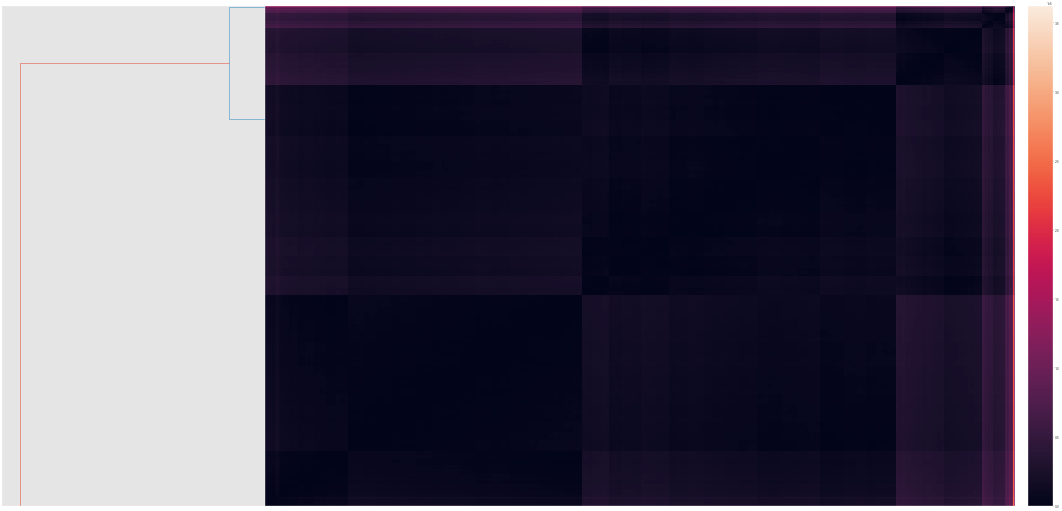

In [12]:
# Abrir figura nueva
fig = pylab.figure()

# Calcular dendrograma y graficar.
axdendro = fig.add_axes([0.09,0.1,0.3,0.8])
Y = linkage(d, method='centroid')
Z = dendrogram(Y, orientation='right')
axdendro.set_xticks([])
axdendro.set_yticks([])
axdendro.invert_xaxis()

# Graficar la matriz de distancias.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.8])
index = Z['leaves']
d = d[index,:]
d = d[:,index]
im = axmatrix.matshow(d, aspect='auto', origin='lower')
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Graficar la barra de color
axcolor = fig.add_axes([0.91,0.1,0.02,0.8])
pylab.colorbar(im, cax=axcolor)


## Silouhette y SSE

In [13]:
## Silhuette promedio usando sklearn
df=df_2
cluster = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')
labels_predicted = cluster.fit_predict(df)
silhouette_avg = silhouette_score(df, labels_predicted)
silhouette_avg

0.4763141540124743

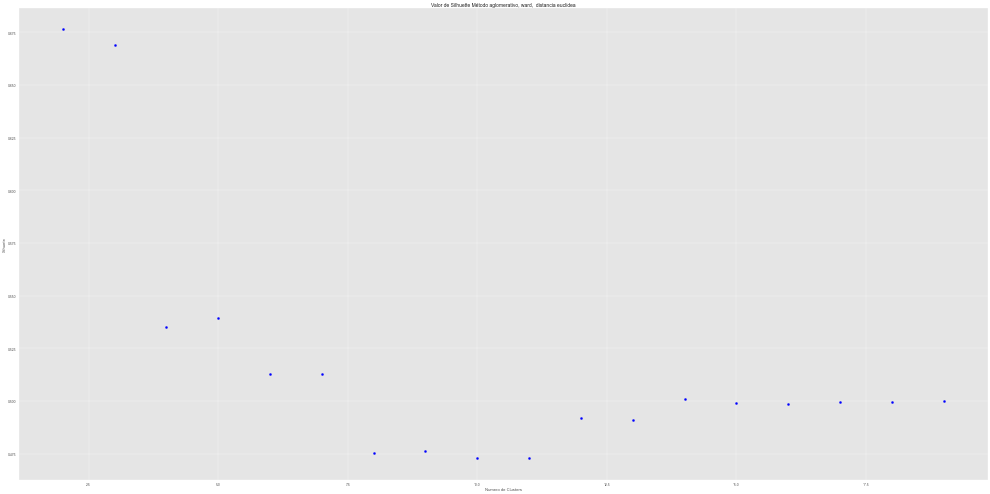

In [14]:
cs=[]
for i in range(2, 20):
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    labels_predicted = cluster.fit_predict(df)
    silhouette_avg = silhouette_score(df, labels_predicted)
    cs.append(silhouette_avg)
plt.plot(range(2, 20), cs, 'bo')
plt.title('Valor de Silhuette Método aglomerativo, ward,  distancia euclidea')
plt.xlabel('Numero de Clusters')
plt.ylabel('Silhuete')
plt.show()

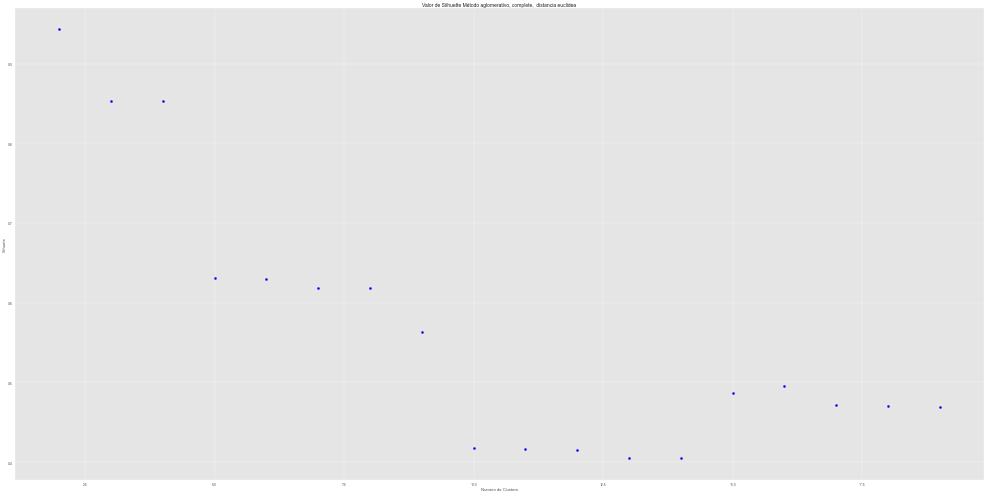

In [15]:
cs=[]
for i in range(2, 20):
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='complete')
    labels_predicted = cluster.fit_predict(df)
    silhouette_avg = silhouette_score(df, labels_predicted)
    cs.append(silhouette_avg)
plt.plot(range(2, 20), cs, 'bo')
plt.title('Valor de Silhuette Método aglomerativo, complete,  distancia euclidea')
plt.xlabel('Numero de Clusters')
plt.ylabel('Silhuete')
plt.show()

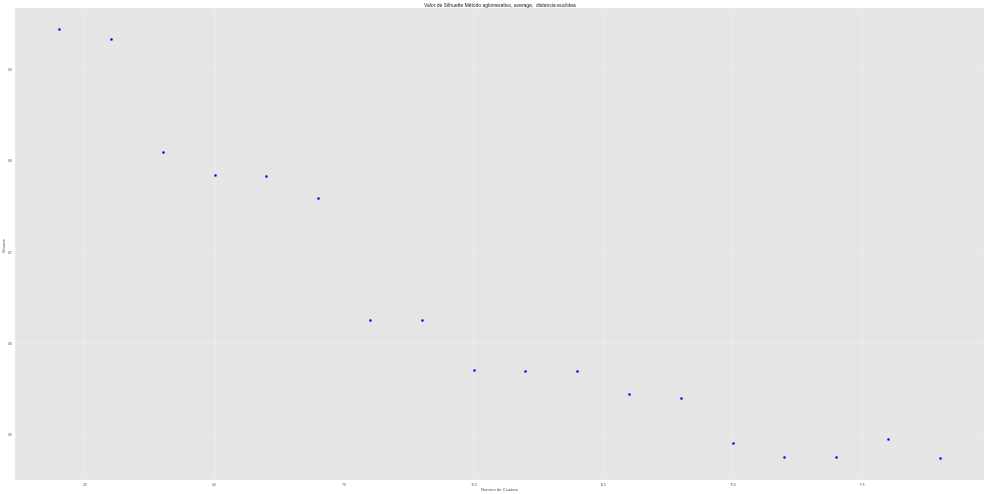

In [16]:
cs=[]
for i in range(2, 20):
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='average')
    labels_predicted = cluster.fit_predict(df)
    silhouette_avg = silhouette_score(df, labels_predicted)
    cs.append(silhouette_avg)
plt.plot(range(2, 20), cs, 'bo')
plt.title('Valor de Silhuette Método aglomerativo, average,  distancia euclidea')
plt.xlabel('Numero de Clusters')
plt.ylabel('Silhuete')
plt.show()

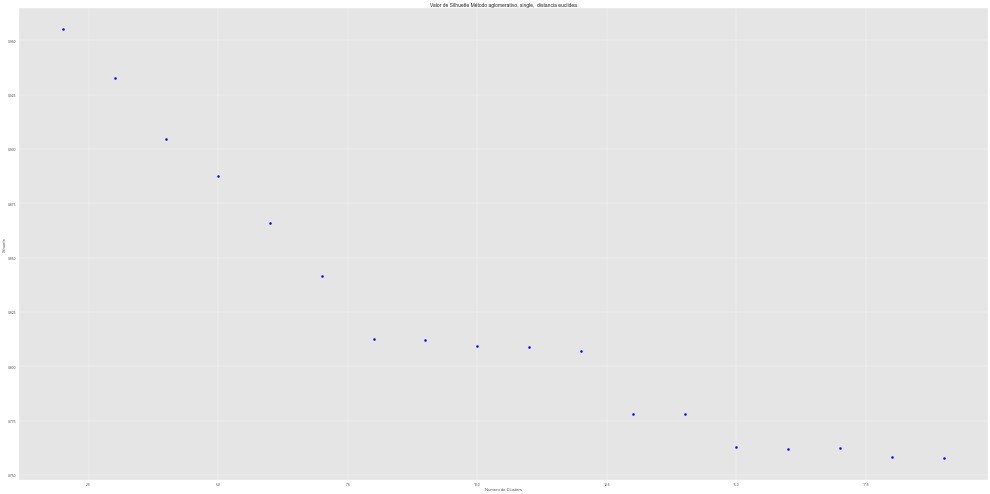

In [17]:
cs=[]
for i in range(2, 20):
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='single')
    labels_predicted = cluster.fit_predict(df)
    silhouette_avg = silhouette_score(df, labels_predicted)
    cs.append(silhouette_avg)
plt.plot(range(2, 20), cs, 'bo')
plt.title('Valor de Silhuette Método aglomerativo, single,  distancia euclidea')
plt.xlabel('Numero de Clusters')
plt.ylabel('Silhuete')
plt.show()

###  SSE (?) PARA JERARQUICO CREO QUE NO TIENE SENTIDO

## Validación de Clustering Jerarquico (Coeficiente de correlación cofenético)

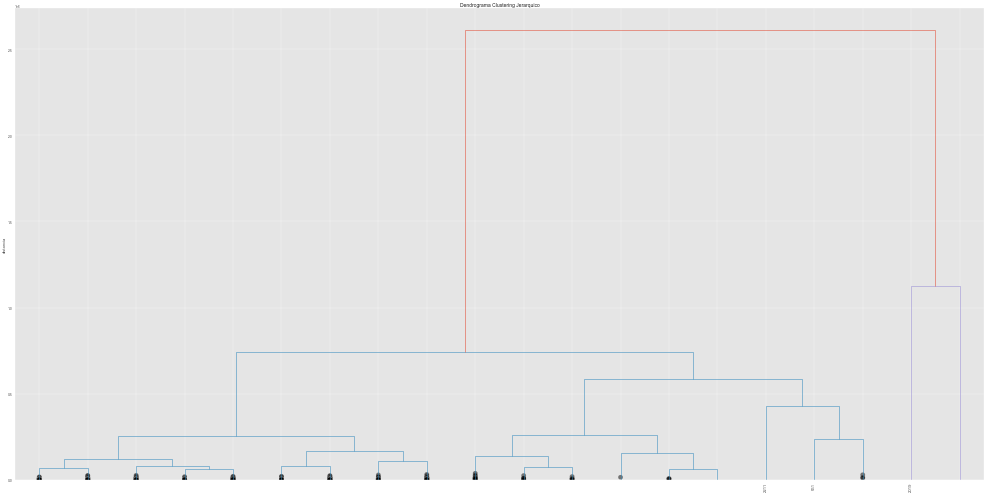

0.889755508748311

In [18]:
df=df_2
z = linkage(df, method='average', metric='euclidean')
plt.figure()
dn = dendrogram(
                z,
                show_leaf_counts=False,  # otherwise numbers in brackets are counts
                leaf_rotation=90.,
                leaf_font_size=12.,
                show_contracted=True,  # to get a distribution impression in truncated branches
                p=20 ,
                truncate_mode = 'lastp'
)
plt.title('Dendrograma Clustering Jerarquico')
plt.ylabel('distancia')
plt.show()
c, coph_dists = cophenet(z, pdist(df))
c

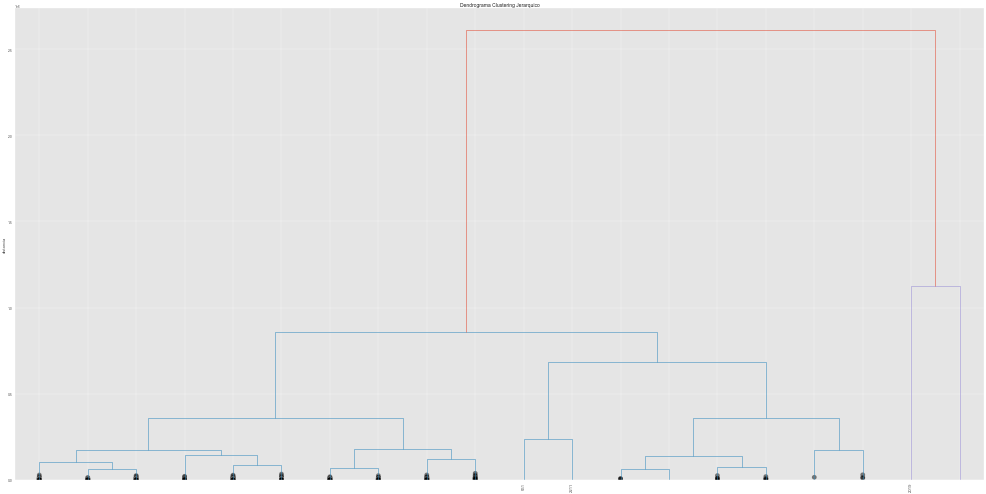

0.9002669719236287

In [19]:
df=df_2
z = linkage(df, method='centroid', metric='euclidean')
plt.figure()
dn = dendrogram(
                z,
                show_leaf_counts=False,  # otherwise numbers in brackets are counts
                leaf_rotation=90.,
                leaf_font_size=12.,
                show_contracted=True,  # to get a distribution impression in truncated branches
                p=20 ,truncate_mode = 'lastp'
)
plt.title('Dendrograma Clustering Jerarquico')
plt.ylabel('distancia')
plt.show()
c, coph_dists = cophenet(z, pdist(df))
c

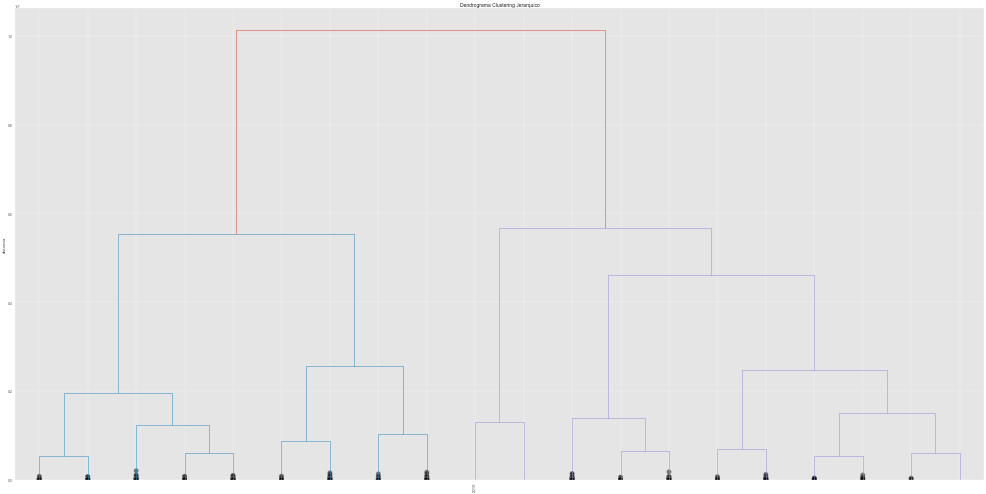

0.6011938633007927

In [20]:
df=df_2
z = linkage(df, method='ward', metric='euclidean')
plt.figure()
dn = dendrogram(
                z,
                show_leaf_counts=False,  # otherwise numbers in brackets are counts
                leaf_rotation=90.,
                leaf_font_size=12.,
                show_contracted=True,  # to get a distribution impression in truncated branches
                p=20 ,
                truncate_mode = 'lastp'
)
plt.title('Dendrograma Clustering Jerarquico')
plt.ylabel('distancia')
plt.show()
c, coph_dists = cophenet(z, pdist(df))
c

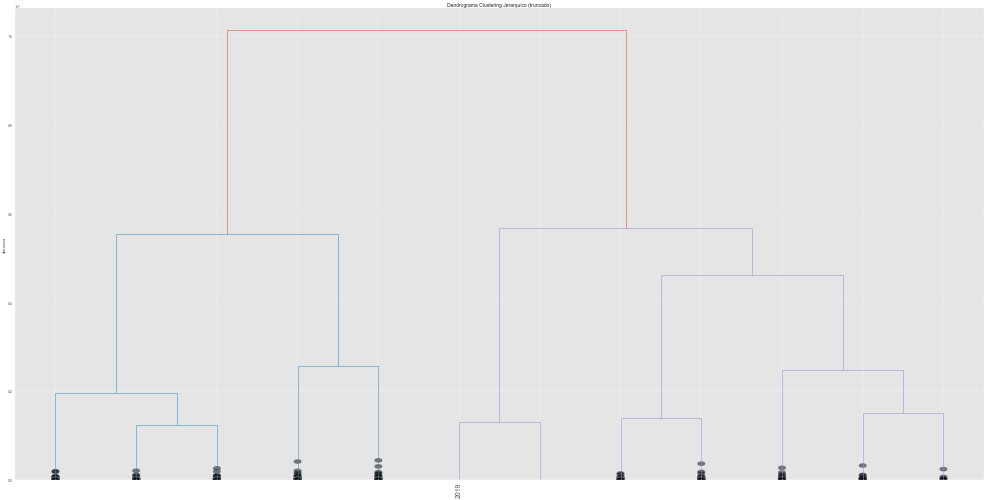

In [21]:
dendrogram(
    z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=20.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Dendrograma Clustering Jerarquico (truncado)')
plt.ylabel('distancia')
plt.show()

## b) Agrupamientos similares para distintos conjuntos de datos (validación)

## Matriz de confusion, Índices de Van Dongen y Rand

In [22]:
cluster = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')
labels_predicted = cluster.fit_predict(df_2)

In [23]:
tmp = pd.DataFrame({'Labels': np.array(genre_real), 'Clusters': labels_predicted})# Create a DataFrame with labels and varieties as columns: df
tmp

Labels  Clusters
0       jazz         5
1       jazz         5
2       jazz         5
3       jazz         3
4       jazz         3
...      ...       ...
4077  trance         0
4078  trance         0
4079  trance         7
4080  trance         1
4081  trance         3

[4082 rows x 2 columns]

### Matriz de confusión

In [24]:
ct0 = pd.crosstab(tmp['Labels'], tmp['Clusters']) # Create crosstab: ct
ct0

Clusters             0    1  2    3  4    5   6    7   8
Labels                                                  
ambient             78   75  1  120  1   98  10   56   3
classical           57  103  2   77  6   47  26   65  13
death-metal          8   98  0  192  0   38   1  149   0
drum-and-bass       10   19  0  239  0  154   0   54   1
jazz                65  109  0   95  0   79  11   58   4
opera               11  198  0  139  0   25   0   88   0
singer-songwriter    3   96  0  144  0   25   0  179   0
ska                  1  277  0   54  0   13   0  132   0
trance             176   49  0   63  0  103   5   79   0

## Criterio Van Dongen

### Definición de la función

In [25]:
def vanDongen(ct):
    n2=2*(sum(ct.apply(sum,axis=1)))
    sumi = sum(ct.apply(np.max,axis=1))
    sumj = sum(ct.apply(np.max,axis=0))
    maxsumi = np.max(ct.apply(sum,axis=1))
    maxsumj = np.max(ct.apply(sum,axis=0))
    vd = (n2 - sumi - sumj)/(n2 - maxsumi - maxsumj)
    return vd

In [26]:
print(vanDongen(ct0))

0.8389016018306636


## Indice Rand


In [27]:
# a es el número de pares de objetos que aparecen juntos en un clúster y además pertenecen a la misma clase.
# b es el número de pares de objetos que pertenecen a clases diferentes y además están en clústeres diferentes.
# c es el número de pares de objetos que comparten la clase, pero se ubican en diferentes clústeres.
# d es el número de objetos que pertenecen a clases diferentes, sin embargo se agrupan en el mismo clúster.
# n es el número total de objetos

from sklearn.metrics import adjusted_rand_score

In [28]:
hierarchy_cluster = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')
labels_predicted = hierarchy_cluster.fit_predict(df_2)
ari0 = adjusted_rand_score(genre_real, labels_predicted)
ari0

0.059180680859221756

## c) Evaluar si los clusters se condicen con los géneros

### Comparación con matriz de confusión contra géneros

## d) Visualización de los clusters

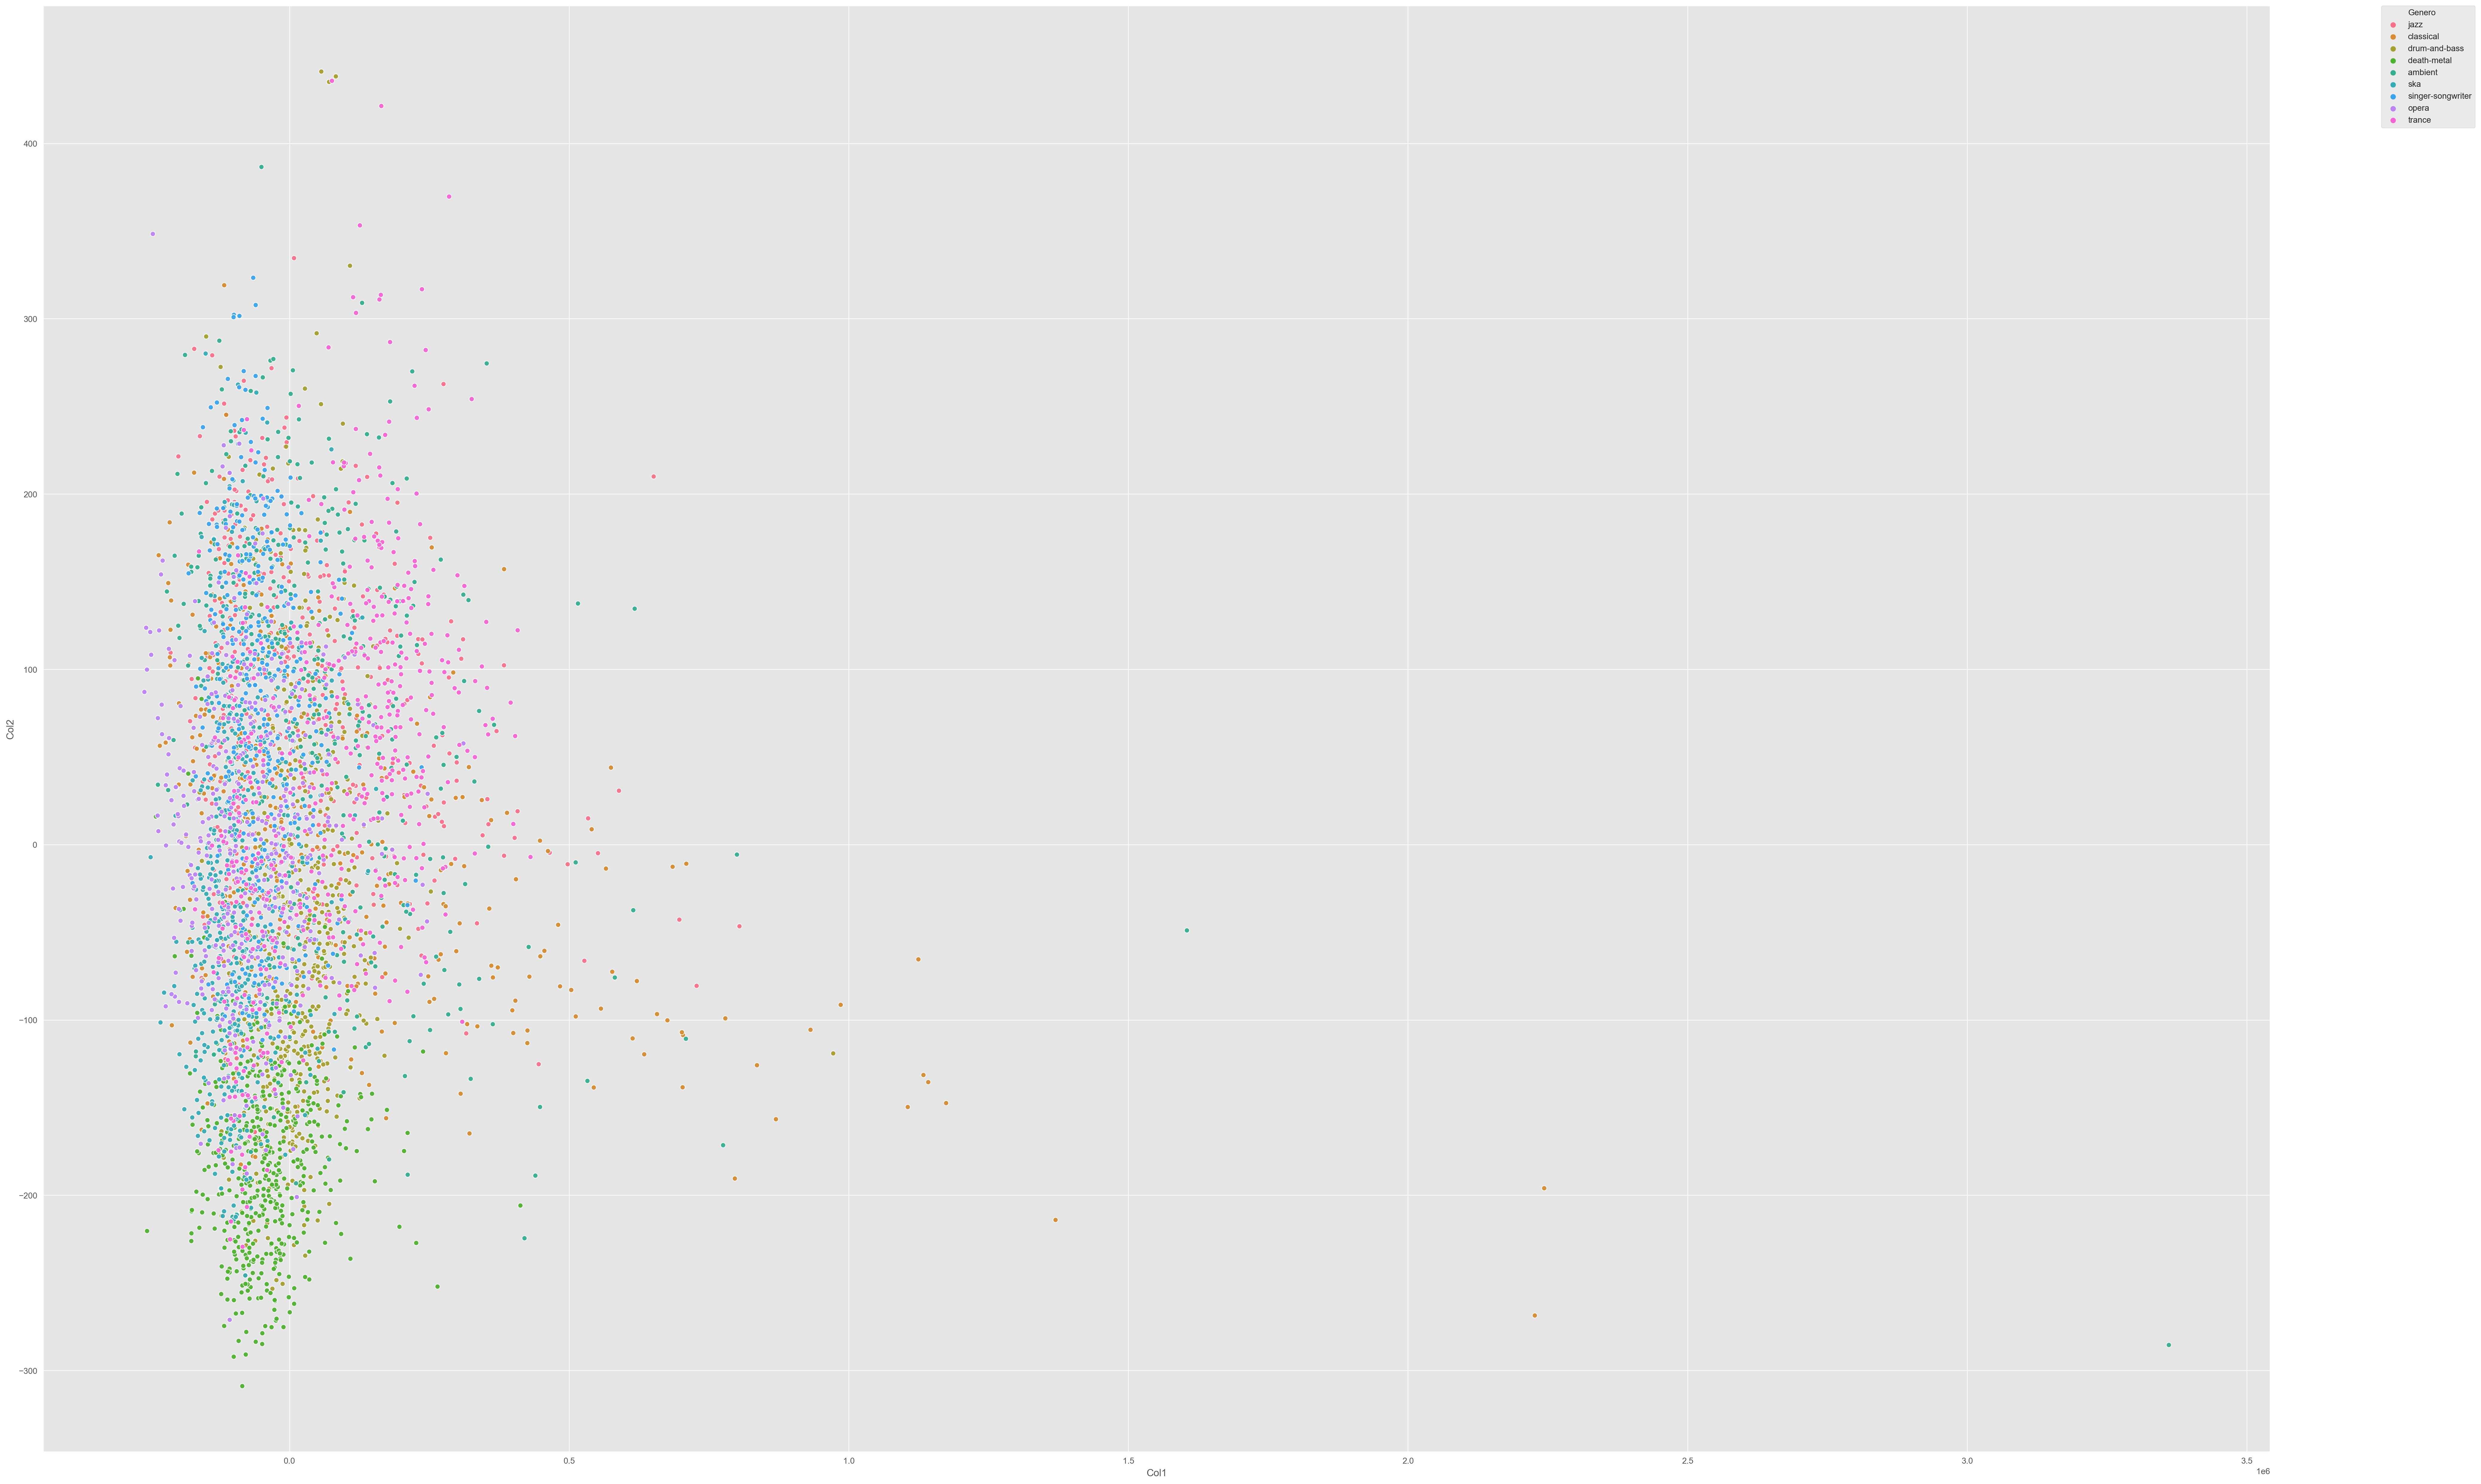

In [29]:
q = pd.Categorical(genre_real)
q.codes
import seaborn as sns

tsne = TSNE(n_components=2, perplexity=20, init='pca')
Xred = tsne.fit_transform(df)

plt.rcParams['figure.figsize'] = [48, 32]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

dfff = pd.DataFrame ({"Col1":Xred[:,0],"Col2":Xred[:,1],"Genero":genre_real.values})
sns.scatterplot(data=dfff, x="Col1", y="Col2", hue="Genero",alpha=0.95)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#    plt._legend.set_title()
plt.show()

## Conclusiones / Resultados obtenidos